In [1]:
# Import Statements

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import spacy
import random

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nlp-getting-started/sample_submission.csv
/kaggle/input/nlp-getting-started/train.csv
/kaggle/input/nlp-getting-started/test.csv


In [2]:
# Load in the data from .csv file
train_data = pd.read_csv('../input/nlp-getting-started/train.csv')
train_data.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [3]:
# Load in the data from .csv file
test_data = pd.read_csv('../input/nlp-getting-started/test.csv')
test_data.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


Text(0.5, 1.0, "Count of NaN's in data")

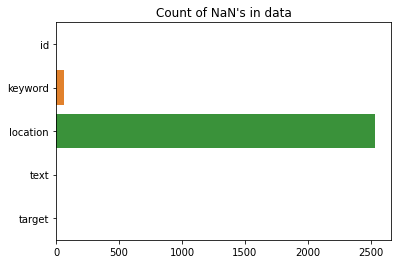

In [4]:
# Evaluate Missing Values
train_na_count = train_data.isna().sum()
sns.barplot(x=train_na_count.values, y=train_na_count.index)
plt.title("Count of NaN's in data")

In [5]:
train_data.isna().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [6]:
test_data.isna().sum()

id             0
keyword       26
location    1105
text           0
dtype: int64

In [7]:
train_data.count()


id          7613
keyword     7552
location    5080
text        7613
target      7613
dtype: int64

In [8]:
test_data.count()


id          3263
keyword     3237
location    2158
text        3263
dtype: int64

In [9]:
# Create an empty model
nlp = spacy.blank("en")
# Create the TextCategorizer with exclusive classes and "bow" architecture
textcat = nlp.create_pipe(
              "textcat",
              config={
                "exclusive_classes": True,
                "architecture": "bow"})
# Add the TextCategorizer to the empty model
nlp.add_pipe(textcat)


In [10]:
# Add labels to text classifier
textcat.add_label("Disaster")
textcat.add_label("Not_Disaster")


1

In [11]:
train_texts = train_data['text'].values
train_labels = [{'cats': {'Disaster': target == 1,
                          'Not_Disaster': target == 0}} 
                for target in train_data['target']]
train_classifier_data = list(zip(train_texts, train_labels))

In [12]:
train_classifier_data[:3]

[('Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all',
  {'cats': {'Disaster': True, 'Not_Disaster': False}}),
 ('Forest fire near La Ronge Sask. Canada',
  {'cats': {'Disaster': True, 'Not_Disaster': False}}),
 ("All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected",
  {'cats': {'Disaster': True, 'Not_Disaster': False}})]

In [13]:
random.seed(1)
spacy.util.fix_random_seed(1)
optimizer = nlp.begin_training()
losses = {}
for epoch in range(100):
    random.shuffle(train_classifier_data)
    # Create the batch generator with batch size = 8
    batches = spacy.util.minibatch(train_classifier_data, size=8)
    # Iterate through minibatches
    for batch in batches:
        # Each batch is a list of (text, label) but we need to
        # send separate lists for texts and labels to update().
        # This is a quick way to split a list of tuples into lists
        texts, labels = zip(*batch)
        nlp.update(texts, labels, sgd=optimizer, losses=losses)
    print(losses)


{'textcat': 5.311279617191758}
{'textcat': 8.446476191224065}
{'textcat': 10.580094419201487}
{'textcat': 12.142444305991376}
{'textcat': 13.328999306524565}
{'textcat': 14.263951404558611}
{'textcat': 15.022631380922121}
{'textcat': 15.645888627128897}
{'textcat': 16.16052245742469}
{'textcat': 16.598223631826045}
{'textcat': 16.969649533917988}
{'textcat': 17.295636651601427}
{'textcat': 17.58023423897157}
{'textcat': 17.834526663513913}
{'textcat': 18.060132185460112}
{'textcat': 18.26804351703722}
{'textcat': 18.4562601208178}
{'textcat': 18.621803418888405}
{'textcat': 18.783862695975735}
{'textcat': 18.933105522479103}
{'textcat': 19.06777803666499}
{'textcat': 19.202309141184248}
{'textcat': 19.324673106368714}
{'textcat': 19.44109167137889}
{'textcat': 19.55588093339114}
{'textcat': 19.663643769016645}
{'textcat': 19.771402243135654}
{'textcat': 19.875403627925916}
{'textcat': 19.97551203522485}
{'textcat': 20.07133309165179}
{'textcat': 20.165790080947836}
{'textcat': 20.26018

In [14]:
test_data['text'].values

array(['Just happened a terrible car crash',
       'Heard about #earthquake is different cities, stay safe everyone.',
       'there is a forest fire at spot pond, geese are fleeing across the street, I cannot save them all',
       ..., 'Green Line derailment in Chicago http://t.co/UtbXLcBIuY',
       'MEG issues Hazardous Weather Outlook (HWO) http://t.co/3X6RBQJHn3',
       '#CityofCalgary has activated its Municipal Emergency Plan. #yycstorm'],
      dtype=object)

In [15]:
docs = [nlp.tokenizer(text) for text in test_data['text'].values]

In [16]:
docs[:3]

[Just happened a terrible car crash,
 Heard about #earthquake is different cities, stay safe everyone.,
 there is a forest fire at spot pond, geese are fleeing across the street, I cannot save them all]

In [17]:
# Use textcat to get the scores for each doc
textcat = nlp.get_pipe('textcat')
scores, _ = textcat.predict(docs)
print(scores)


[[0.99586356 0.00413645]
 [0.82164735 0.17835265]
 [0.9879951  0.01200484]
 ...
 [0.9980665  0.00193357]
 [0.9973731  0.00262693]
 [0.5431238  0.45687622]]


In [18]:
scores.shape

(3263, 2)

In [19]:
# From the scores, find the label with the highest score/probability
predicted_labels = scores.argmax(axis=1)
#print([textcat.labels[label] for label in predicted_labels])
#['Disaster', 'Not_Disaster']
predicted_labels[:10]

array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1])

In [20]:
my_submission_v_1 = pd.DataFrame({'id':test_data['id'].values, 'target':predicted_labels})
my_submission_v_1.count()

id        3263
target    3263
dtype: int64

In [21]:
test_data['predicted_target'] = predicted_labels.tolist()

In [22]:
my_submission_v_1.to_csv('my_submission_v_1.1.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
